## bank_churn prediction 

### 1. 데이터 전처리 
1. 병합하기 전의 raw data.csv사용시, 병합하기 위해서 명목형 중국어 문자 -> 한국어로 변형해주어야함.
2. 병합한 X_tes.csv, X_train.csv, y_train.csv는 명목형 문자들이 제외되어 있음. 

### 2. 데이터 EDA 
1. 연속형 자료 x축 : 날짜형, y축 : 연속형 변수 
1-1. 이진형 (0 or 1)
2. 명목형 자료 : bar chart 


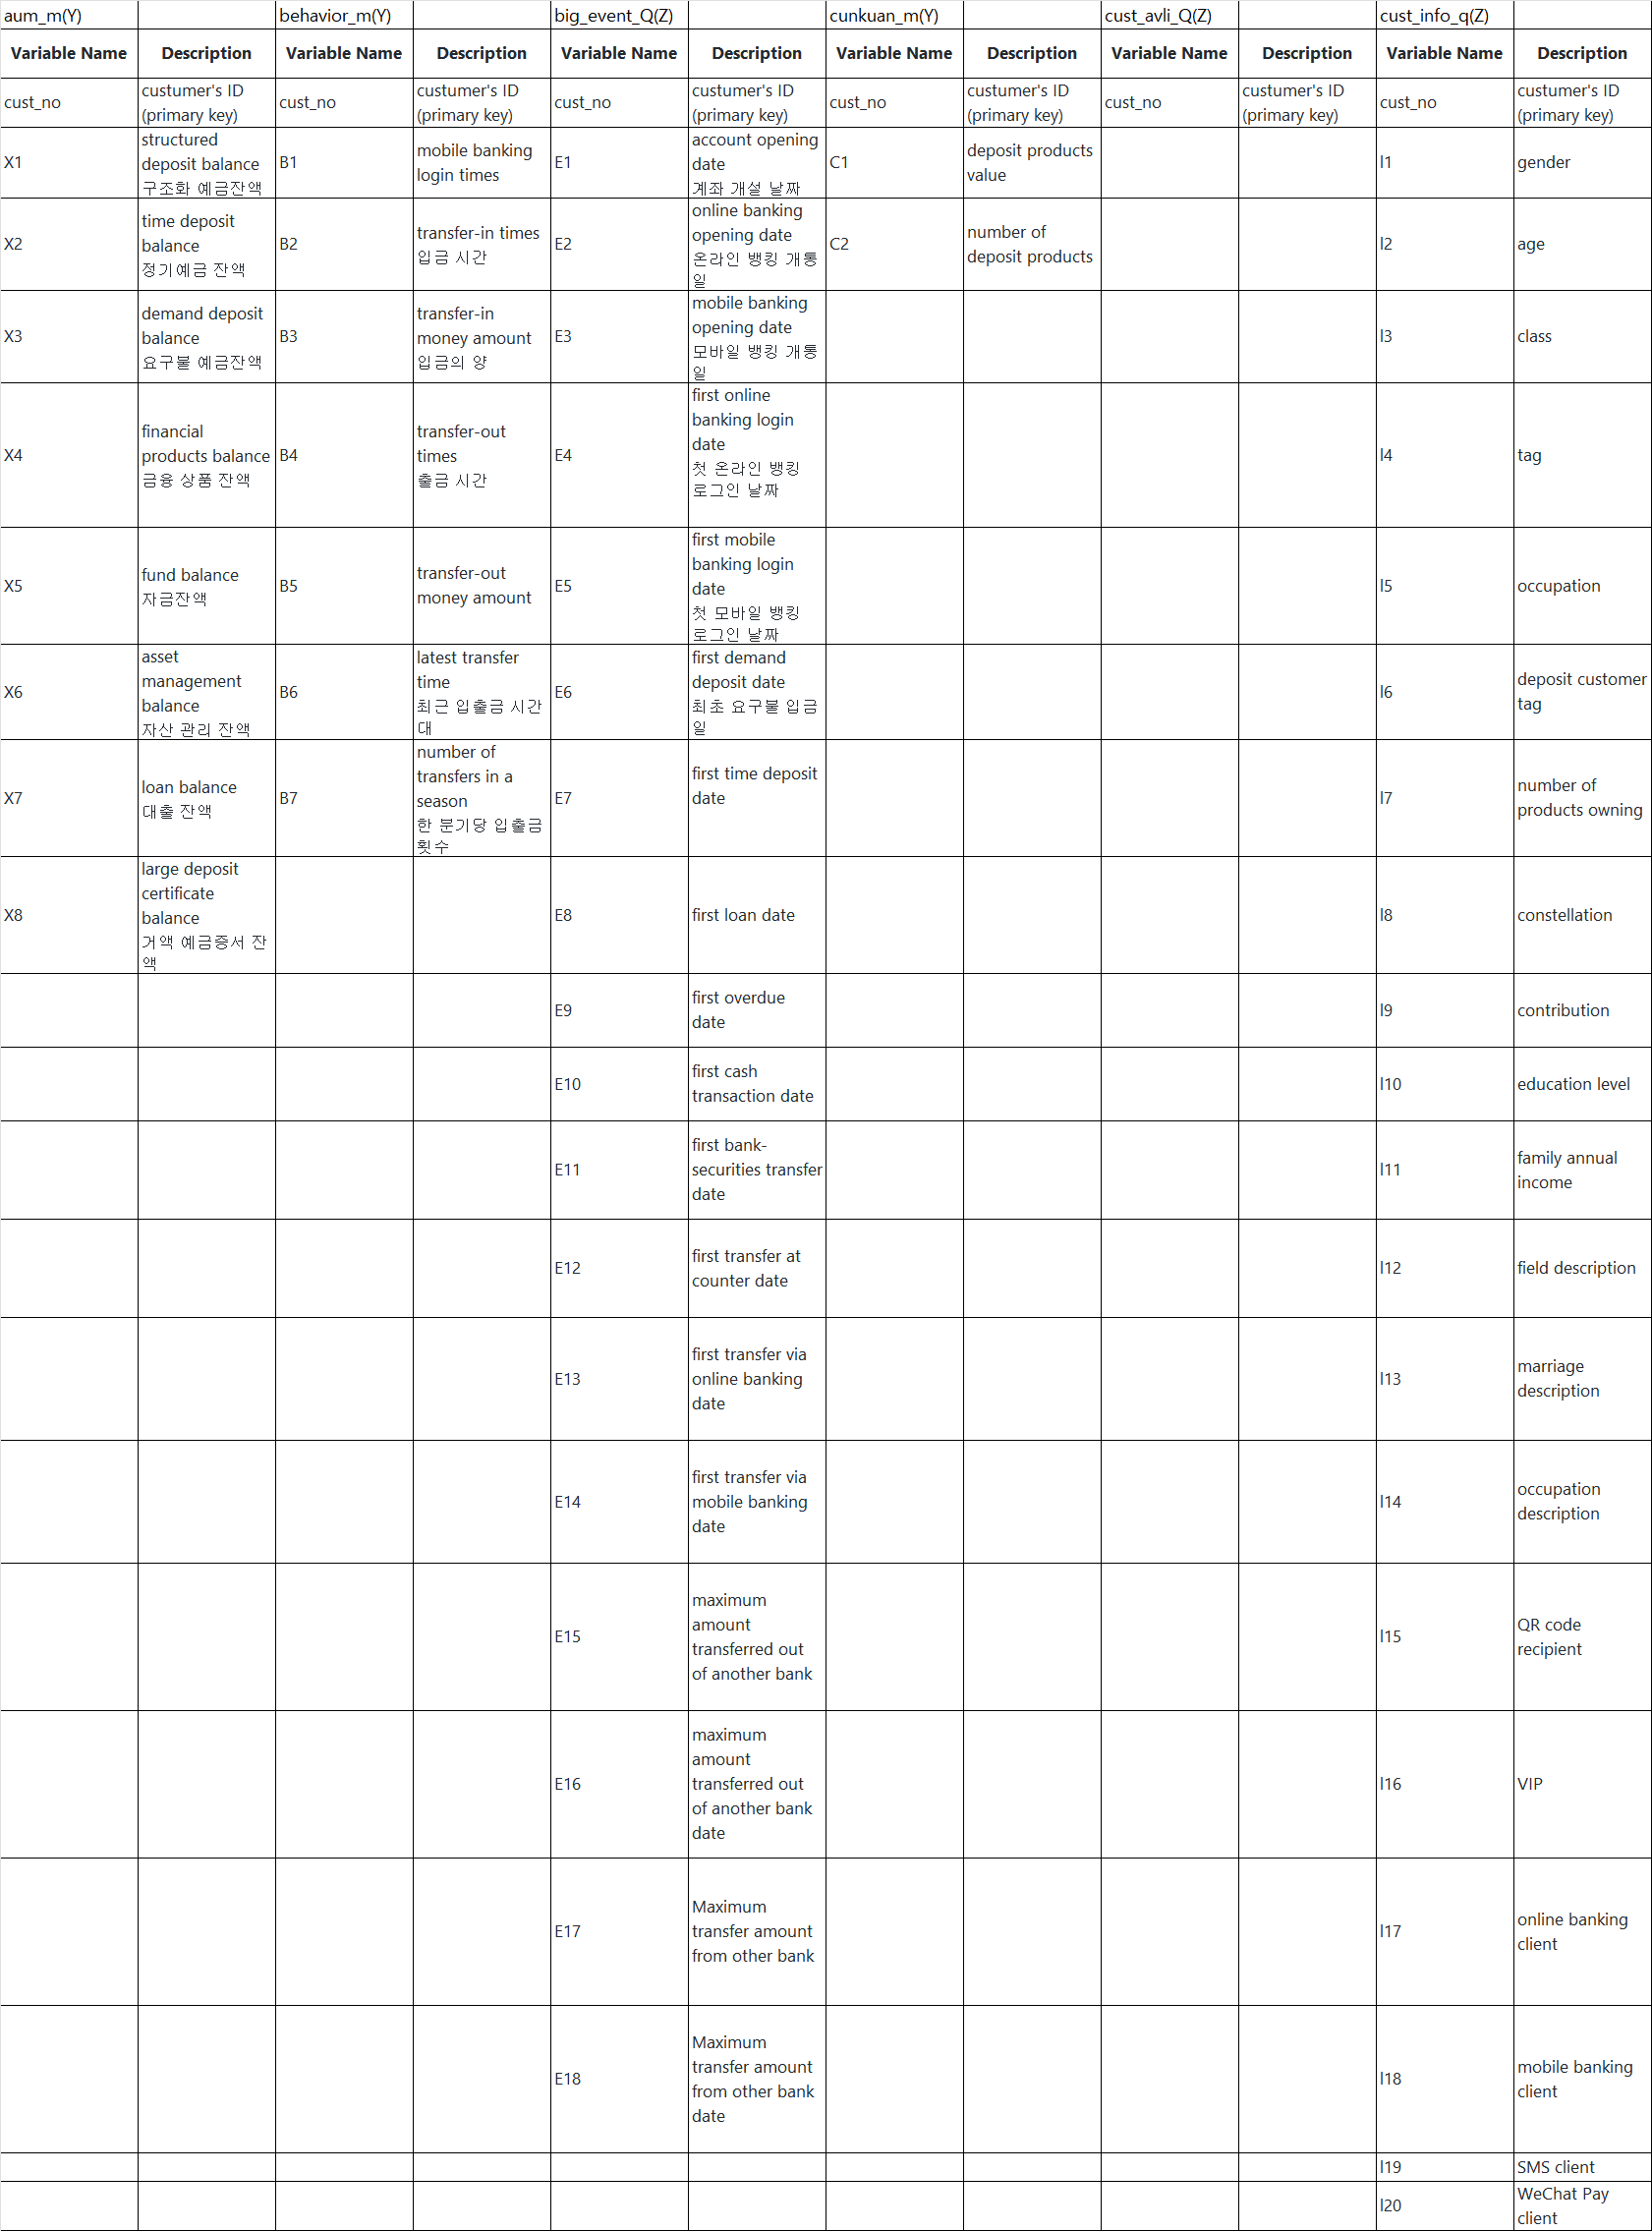

## 1. 데이터 전처리 

### 1-1. 필요한 라이브러리 및 모듈 설치하기 

In [2]:
import os 
os.getcwd()  
import pandas as pd
pd.set_option('display.max_columns', None)
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### 1-2. raw데이터 병합하기 

In [3]:
# 병합하기 'aum_m', 'behavior_m', 'cunkuan_m'

dir = os.getcwd()
path = dir+'/bank-churn-prediction/data/raw/x_train/'

df_name = ['aum_m', 'behavior_m', 'cunkuan_m']
path_list = [7,8,9,10,11,12]

for i in df_name:
    for j in path_list:
        globals()['{}{}'.format(i,j)] = pd.read_csv(str(path) + str(i) + str(j) +'.csv', encoding = 'UTF-8')


In [4]:
# 병합하기 'big_event_Q','cust_avli_Q', 'cust_info_q'

df_name = ['big_event_Q','cust_avli_Q', 'cust_info_q']  
path_list =[3,4]  

for i in df_name:
    for j in path_list:
        globals()['{}{}'.format(i,j)] = pd.read_csv(str(path)+str(i)+str(j)+'.csv', encoding = 'UTF-8')
        

C:\Users\wlsdk\AppData\Local\Temp\ipykernel_17772\130186970.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()['{}{}'.format(i,j)] = pd.read_csv(str(path)+str(i)+str(j)+'.csv', encoding = 'UTF-8')


In [96]:
''' 이것은 long형태의 df병합방법으로, 첫번째 시도 
aum_m 데이터 열이름 변경 및 병합 

aum_m7 = aum_m7.rename(columns={'X1':'X1_m7', 'X2':'X2_m7', 'X3':'X3_m7', 'X4':'X4_m7', 'X5':'X5_m7', 'X6':'X6_m7', 'X7':'X7_m7', 'X8':'X8_m7'})
aum_m8 = aum_m8.rename(columns={'X1':'X1_m8', 'X2':'X2_m8', 'X3':'X3_m8', 'X4':'X4_m8', 'X5':'X5_m8', 'X6':'X6_m8', 'X7':'X7_m8', 'X8':'X8_m8'})
aum_m9 = aum_m9.rename(columns={'X1':'X1_m9', 'X2':'X2_m9', 'X3':'X3_m9', 'X4':'X4_m9', 'X5':'X5_m9', 'X6':'X6_m9', 'X7':'X7_m9', 'X8':'X8_m9'})
aum_m10 = aum_m10.rename(columns={'X1':'X1_m10', 'X2':'X2_m10', 'X3':'X3_m10', 'X4':'X4_m10', 'X5':'X5_m10', 'X6':'X6_m10', 'X7':'X7_m10', 'X8':'X8_m10'})
aum_m11 = aum_m11.rename(columns={'X1':'X1_m11', 'X2':'X2_m11', 'X3':'X3_m11', 'X4':'X4_m11', 'X5':'X5_m11', 'X6':'X6_m11', 'X7':'X7_m11', 'X8':'X8_m11'})
aum_m12 = aum_m12.rename(columns={'X1':'X1_m12', 'X2':'X2_m12', 'X3':'X3_m12', 'X4':'X4_m12', 'X5':'X5_m12', 'X6':'X6_m12', 'X7':'X7_m12', 'X8':'X8_m12'})

aum_m = pd.merge(aum_m7, aum_m8, on='cust_no', how='outer')
aum_m = pd.merge(aum_m, aum_m9, on='cust_no', how='outer')
aum_m = pd.merge(aum_m, aum_m10, on='cust_no', how='outer')
aum_m = pd.merge(aum_m, aum_m11, on='cust_no', how='outer')
aum_m = pd.merge(aum_m, aum_m12, on='cust_no', how='outer')  


# behavior_m  

behavior_m7 = behavior_m7.rename(columns={'B1':'B1_m7', 'B2':'B2_m7', 'B3':'B3_m7', 'B4':'B4_m7', 'B5':'B5_m7'})
behavior_m8 = behavior_m8.rename(columns={'B1':'B1_m8', 'B2':'B2_m8', 'B3':'B3_m8', 'B4':'B4_m8', 'B5':'B5_m8'})
behavior_m9 = behavior_m9.rename(columns={'B1':'B1_m9', 'B2':'B2_m9', 'B3':'B3_m9', 'B4':'B4_m9', 'B5':'B5_m9', 'B6':'B6_m9', 'B7':'B7_m9'})
behavior_m10 = behavior_m10.rename(columns={'B1':'B1_m10', 'B2':'B2_m10', 'B3':'B3_m10', 'B4':'B4_m10', 'B5':'B5_m10'})
behavior_m11 = behavior_m11.rename(columns={'B1':'B1_m11', 'B2':'B2_m11', 'B3':'B3_m11', 'B4':'B4_m11', 'B5':'B5_m11'})
behavior_m12 = behavior_m12.rename(columns={'B1':'B1_m12', 'B2':'B2_m12', 'B3':'B3_m12', 'B4':'B4_m12', 'B5':'B5_m12', 'B6':'B6_m12', 'B7':'B7_m12'})

behavior_m = pd.merge(behavior_m7, behavior_m8, on='cust_no', how='outer')
behavior_m = pd.merge(behavior_m, behavior_m9, on='cust_no', how='outer')
behavior_m = pd.merge(behavior_m, behavior_m10, on='cust_no', how='outer')
behavior_m = pd.merge(behavior_m, behavior_m11, on='cust_no', how='outer')
behavior_m = pd.merge(behavior_m, behavior_m12, on='cust_no', how='outer')


## cunkuan 

cunkuan_m7 = cunkuan_m7.rename(columns = {'C1':'C1_m7', 'C2':'C2_m7'})
cunkuan_m8 = cunkuan_m8.rename(columns = {'C1':'C1_m8', 'C2':'C2_m8'})
cunkuan_m9 = cunkuan_m9.rename(columns = {'C1':'C1_m9', 'C2':'C2_m9'})
cunkuan_m10 = cunkuan_m10.rename(columns = {'C1':'C1_m10', 'C2':'C2_m10'})
cunkuan_m11 = cunkuan_m11.rename(columns = {'C1':'C1_m11', 'C2':'C2_m11'})
cunkuan_m12 = cunkuan_m12.rename(columns = {'C1':'C1_m12', 'C2':'C2_m12'})

cunkuan_m = pd.merge(cunkuan_m7, cunkuan_m8, on='cust_no', how='outer')
cunkuan_m = pd.merge(cunkuan_m, cunkuan_m9, on='cust_no', how='outer')
cunkuan_m = pd.merge(cunkuan_m, cunkuan_m10, on='cust_no', how='outer')
cunkuan_m = pd.merge(cunkuan_m, cunkuan_m11, on='cust_no', how='outer')
cunkuan_m = pd.merge(cunkuan_m, cunkuan_m12, on='cust_no', how='outer')  

## big_event 

big_event_Q3 = big_event_Q3.rename(columns = {'E1':'E1_Q3', 'E2':'E2_Q3', 'E3':'E3_Q3', 'E4':'E4_Q3',
                                              'E5':'E5_Q3', 'E6':'E6_Q3', 'E7':'E7_Q3', 'E8':'E8_Q3',
                                              'E9':'E9_Q3', 'E10':'E10_Q3', 'E11':'E11_Q3', 'E12':'E12_Q3',
                                              'E13':'E13_Q3', 'E14':'E14_Q3', 'E15':'E15_Q3', 'E16':'E16_Q3',
                                              'E17':'E17_Q3', 'E18':'E18_Q3'})
big_event_Q4 = big_event_Q4.rename(columns = {'E1':'E1_Q4', 'E2':'E2_Q4', 'E3':'E3_Q4', 'E4':'E4_Q4',
                                                'E5':'E5_Q4', 'E6':'E6_Q4', 'E7':'E7_Q4', 'E8':'E8_Q4',
                                                'E9':'E9_Q4', 'E10':'E10_Q4', 'E11':'E11_Q4', 'E12':'E12_Q4',
                                                'E13':'E13_Q4', 'E14':'E14_Q4', 'E15':'E15_Q4', 'E16':'E16_Q4',
                                                'E17':'E17_Q4', 'E18':'E18_Q4'})
  
big_event_Q = pd.merge(big_event_Q3, big_event_Q4, on='cust_no', how='outer')  

## cust_info

cust_info_q3 = cust_info_q3.rename(columns = {'I1':'I1_Q3', 'I2':'I2_Q3', 'I3':'I3_Q3', 'I4':'I4_Q3',
                                    'I5':'I5_Q3', 'I6':'I6_Q3', 'I7':'I7_Q3', 'I8':'I8_Q3',
                                    'I9':'I9_Q3', 'I10':'I10_Q3', 'I11':'I11_Q3', 'I12':'I12_Q3',
                                    'I13':'I13_Q3', 'I14':'I14_Q3', 'I15':'I15_Q3', 'I16':'I16_Q3',
                                    'I17':'I17_Q3', 'I18':'I18_Q3', 'I19':'I19_Q3', 'I20':'I20_Q3'})
cust_info_q4 = cust_info_q4.rename(columns = {'I1':'I1_Q4', 'I2':'I2_Q4', 'I3':'I3_Q4', 'I4':'I4_Q4',
                                    'I5':'I5_Q4', 'I6':'I6_Q4', 'I7':'I7_Q4', 'I8':'I8_Q4',
                                    'I9':'I9_Q4', 'I10':'I10_Q4', 'I11':'I11_Q4', 'I12':'I12_Q4',
                                    'I13':'I13_Q4', 'I14':'I14_Q4', 'I15':'I15_Q4', 'I16':'I16_Q4',
                                    'I17':'I17_Q4', 'I18':'I18_Q4', 'I19':'I19_Q4', 'I20':'I20_Q4'})  

cust_info_q = pd.merge(cust_info_q3, cust_info_q4, on='cust_no', how='outer')  

print(aum_m.shape)
print(behavior_m.shape)
print(cunkuan_m.shape)
print(big_event_Q.shape)
print(cust_info_q.shape)  

# cunkuan_m의 행은 다른 데이터프레임과 달리 23만7062개로 2배정도 적은 데이터보유.
# 따라서, 나머지 행 모두 합치고 cunkuan_m와 중복되는 행만 남겨서 최종 df완성 (how='inner') 

final_df = pd.merge(aum_m, behavior_m, on='cust_no', how='outer')  
final_df = pd.merge(final_df, big_event_Q, on='cust_no', how='outer')  
final_df = pd.merge(final_df, cust_info_q, on='cust_no', how='outer')   
final_df = pd.merge(final_df, cunkuan_m, on='cust_no', how='inner')  

final_df.shape

'''

(543823, 49)
(543823, 35)
(237062, 13)
(543823, 37)
(543823, 41)


In [5]:
df_list = [aum_m7, aum_m8, aum_m9, aum_m10, aum_m11, aum_m12,
           behavior_m7, behavior_m8, behavior_m9, behavior_m10, behavior_m11, behavior_m12,
           cunkuan_m7, cunkuan_m8, cunkuan_m9, cunkuan_m10, cunkuan_m11, cunkuan_m12]  

path_list = [7,8,9,10,11,12] 

for df_name, i in zip(df_list, path_list):
    df_name[i] = 1   
    

df_list =  [big_event_Q3, big_event_Q4, 
            cust_avli_Q3, cust_avli_Q4,
            cust_info_q3, cust_info_q4]  
path_list = [3,4]  

for df_name, i in zip(df_list, path_list):  
    df_name[i] = 1  
    
     

In [6]:
aum_Q3 = pd.concat([aum_m7,  aum_m8, aum_m9], axis=0)    
aum_Q4 = pd.concat([aum_m10, aum_m11, aum_m12], axis=0)  


behavior_Q3 = pd.concat([behavior_m7, behavior_m8, behavior_m9], axis=0) 
behavior_Q4 = pd.concat([behavior_m10, behavior_m11, behavior_m12], axis=0)  
  
cunkuan_Q3 = pd.concat([cunkuan_m7, cunkuan_m8, cunkuan_m9], axis=0) 
cunkuan_Q4 = pd.concat([cunkuan_m10, cunkuan_m11, cunkuan_m12], axis=0)  

big_event_Q3.shape
big_event_Q4.shape

cust_avli_Q3.shape
cust_avli_Q4.shape 

cust_info_q3.shape
cust_info_q4.shape  
 

(493441, 20)

(543823, 20)

(69126, 1)

(76170, 1)

(493441, 21)

(543823, 21)

In [7]:
aum_m = pd.concat([aum_Q3, aum_Q4], axis=0) 
behavior_m = pd.concat([behavior_Q3, behavior_Q4], axis=0)  
cunkuan_m = pd.concat([cunkuan_Q3, cunkuan_Q4], axis=0)  

 
big_event = pd.concat([big_event_Q3, big_event_Q4], axis =0 )  

cust_info = pd.concat([cust_info_q3, cust_info_q4], axis =0 ) 



In [9]:
aum_m.shape   
behavior_m.shape  
cunkuan_m.shape
big_event.shape
cust_info.shape

(3009847, 15)

(3009847, 8)

(1239041, 3)

(1037264, 21)

(1037264, 21)

In [21]:
X_train = pd.merge(aum_m, cust_info, how='inner', on='cust_no')    

X_train.shape  

(5928115, 35)

In [27]:
aum_m[aum_m['cust_no'] == '0xb2d0f89c'] 


,cust_no,X1,X2,X3,X4,X5,X6,X7,X8,7,8,9,10,11,12
0,0xb2d0f89c,0.0,0.0,0.00,0,0.0,0.0,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN
1,0xb2d0f89c,0.0,0.0,1.05,0,0.0,0.0,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN
2,0xb2d0f89c,0.0,0.0,0.00,0,0.0,0.0,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN
3,0xb2d0f89c,0.0,0.0,0.00,0,0.0,0.0,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN
4,0xb2d0f89c,0.0,0.0,0.00,0,0.0,0.0,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543818,0xb2d0f89c,0.0,0.0,0.00,0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,1.0
543819,0xb2d0f89c,0.0,0.0,20.95,0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,1.0
543820,0xb2d0f89c,0.0,0.0,10.05,0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,1.0
543821,0xb2d0f89c,0.0,0.0,0.03,0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,1.0


In [22]:
X_train

,cust_no,X1,X2,X3,X4,X5,X6,X7,X8,7,8,9,10,11,12,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,I17,I18,I19,I20
0,0xb2d0f89c,0.0,0.0,0.00,0,0.0,0.0,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN,男性,35,普通客户,0.0,NaN,0,0,摩羯座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,0
1,0xb2d0f89c,0.0,0.0,0.00,0,0.0,0.0,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN,男性,36,普通客户,0.0,NaN,0,0,摩羯座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,0
2,0xb2d0f89c,0.0,0.0,0.00,0,0.0,0.0,0.0,0,NaN,1.0,NaN,NaN,NaN,NaN,男性,35,普通客户,0.0,NaN,0,0,摩羯座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,0
3,0xb2d0f89c,0.0,0.0,0.00,0,0.0,0.0,0.0,0,NaN,1.0,NaN,NaN,NaN,NaN,男性,36,普通客户,0.0,NaN,0,0,摩羯座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,0
4,0xb2d0f89c,0.0,0.0,0.00,0,0.0,0.0,0.0,0,NaN,NaN,1.0,NaN,NaN,NaN,男性,35,普通客户,0.0,NaN,0,0,摩羯座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928110,0xb2da37f8,0.0,0.0,1.00,0,0.0,0.0,45000.0,0,NaN,NaN,NaN,NaN,NaN,1.0,男性,33,普通客户,0.0,服务性工作人员,1,0,巨蟹座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,0
5928111,0xb2da576c,0.0,0.0,100.00,0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,1.0,女性,49,普通客户,0.0,服务性工作人员,0,0,白羊座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,0
5928112,0xb2da3fa8,0.0,0.0,2.35,0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,1.0,女性,29,普通客户,0.0,服务性工作人员,0,0,处女座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,1
5928113,0xb2da2dc3,0.0,0.0,0.00,0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,1.0,男性,37,普通客户,0.0,专业技术人员,0,0,射手座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,0


In [ ]:
X_train = pd.merge(X_train, big_event, how='outer', on='cust_no')   
X_train = pd.merge(X_train, cunkuan_m, how='outer', on='cust_no')  
X_train = pd.merge(X_train, cust_info, how='outer', on='cust_no')  

In [ ]:
## y_train.csv  

y_train = pd.read_csv(r'C:\Users\wlsdk\OneDrive - 아주대학교\Ajou univ 3-2\Bitamin\컨퍼런스\bank-churn-prediction\data\y_train.csv', encoding ='UTF-8')  

X_train = pd.merge(X_train, y_train, how='inner', on='cust_no')     

X_train.shape  

X_train = X_train.drop('label', axis='columns') 


### 1-3. 중복제거

In [106]:
X_train.duplicated(subset=['cust_no']).sum()  
X_train.shape  
X_train.isnull().sum(1) 

0

(236693, 171)

In [ ]:
X_train.to_csv('X_train.csv', encoding = 'utf-8-sig')  

### 1-4. 결측치 확인 

In [163]:
## 결측치 확인 

def check_missing(df):
    missing_val = df.isnull().sum()  
    for index in missing_val.index:
        if missing_val[index] > 0:
            print('{} has {} missing values. ({:.4%})'.format(index, missing_val[index], missing_val[index]/df.shape[0]))  
            
            
check_missing(X_train)  


X1_m7 has 17080 missing values. (11.7558%)
X2_m7 has 17080 missing values. (11.7558%)
X3_m7 has 17080 missing values. (11.7558%)
X4_m7 has 17080 missing values. (11.7558%)
X5_m7 has 17080 missing values. (11.7558%)
X6_m7 has 17080 missing values. (11.7558%)
X7_m7 has 17080 missing values. (11.7558%)
X8_m7 has 17080 missing values. (11.7558%)
X1_m8 has 12130 missing values. (8.3488%)
X2_m8 has 12130 missing values. (8.3488%)
X3_m8 has 12130 missing values. (8.3488%)
X4_m8 has 12130 missing values. (8.3488%)
X5_m8 has 12130 missing values. (8.3488%)
X6_m8 has 12130 missing values. (8.3488%)
X7_m8 has 12130 missing values. (8.3488%)
X8_m8 has 12130 missing values. (8.3488%)
X1_m9 has 7132 missing values. (4.9088%)
X2_m9 has 7132 missing values. (4.9088%)
X3_m9 has 7132 missing values. (4.9088%)
X4_m9 has 7132 missing values. (4.9088%)
X5_m9 has 7132 missing values. (4.9088%)
X6_m9 has 7132 missing values. (4.9088%)
X7_m9 has 7132 missing values. (4.9088%)
X8_m9 has 7132 missing values. (4

In [144]:
final_df[['I4_Q3','I5_Q3','I6_Q3','I7_Q3', ]].value_counts()


I4_Q3  I6_Q3
0.0    0.0      171214
       1.0       31026
1.0    0.0        4156
       1.0         204
dtype: int64

0.0    202240
1.0      4360
Name: I4_Q3, dtype: int64

0.0    175370
1.0     31230
Name: I6_Q3, dtype: int64

0.0    206600
Name: I7_Q3, dtype: int64

天秤座    20963
天蝎座    19494
处女座    18564
狮子座    17584
摩羯座    17360
射手座    17016
水瓶座    16996
双鱼座    16573
巨蟹座    16205
双子座    15702
金牛座    15250
白羊座    14893
Name: I8_Q3, dtype: int64

In [20]:
# customer_info의 명목형 변수 중국어 -> 한국어 번역 

import googletrans
from googletrans import Translator  

# 번역예시 
print((translator.translate('안녕', src='ko', dest='zh-cn').text))  


################# 오류 - Unexpected status code "429" from ('translate.google.com',)####### 
translator = Translator()  
translator.raise_Exception = True 

try : 
     df_cust_info['I1'] = df_cust_info['I1'].apply(lambda x : translator.translate(x, dest='ko').text)
     time.sleep(1)
     
except Exception as err:  
    df_cust_info['I1'] = df_cust_info['I1'].apply(lambda x : translator.translate(x, dest='ko').text)
    time.sleep(1)
   


## 01-04 회의 

원래 frequency 구하려면 처음 온라인 뱅킹 가입날짜가 있다면 뱅킹을 마지막으로 쓴 날짜도 있어야 
주기를 계산할 수 있을것 같은데,, 즉, 우리가 하고자 했던건 
고객들이 언제 이탈할것인지 이탈하는 "시기"를 예측하는것인데 
마지막 사용한 날짜와 관련된 열(데이터)가 없다면 어떻게 예측할 수 있을지..

<cust_info_q>  

I열 value_counts()  
I1 gender 중국어 번역 필요   
I3 class 중국어 번역 필요  
I4 tag 0과 1 비율이? 거의 0인듯   
I5 occupation -> class 몇개인지 중국어 번역필요   
I6 deposit customer tag -> 0과 1 비율이  
I7 number of products owning  -> 0과 1비율   
I8 별자리 -> class 몇개인지  중국어 번I역필요   
I9 contribution (데이터가 없는데?)   
I10 education level (데이터가 거의ㅣ 없는데?) 중국어 번역필요   
I11 family annual -> 0...이 많은데?  
I12 field description -> 개인? class가? 중국어 번역필요   


<데이터없>  

I13 데이터없  
I14 데이터없

E7 최초입금일   
E8 최초 대출일  
E9 최초 연체날짜   
E11 최초 은행- 증권이체 날짜   
E13 온라인 뱅킹을 이용한 최초 이체 날짜    


### 2. 통계량 확인 및 EDA

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rc('font', family = 'NanumBarunGothic')


In [44]:
#df_aum 평균치
 
df_aum = df_0.groupby('cust_no').mean().reset_index() .set_index('cust_no', drop= True) 
df_aum.mean(axis=0)

pl = sns.barplot(x= df_aum.columns, y = df_aum.mean(axis=0))
pl

<AxesSubplot:>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


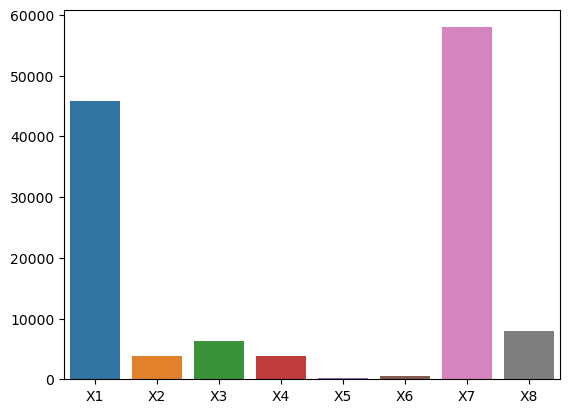

In [53]:
df['C1'].mean()

337523.6655362098

In [55]:
df['C2'].mean()

2.6911546085232905